Top 1000 contributing bands: ['3117' '3118' '3119' '3661' '3120' '3121' '3122' '1204' '3123' '3124'
 '3125' '3126' '3127' '3128' '3660' '3129' '3130' '3131' '3132' '3133'
 '3134' '3135' '3136' '3137' '1203' '3659' '3138' '3139' '3140' '3141'
 '3142' '3143' '3144' '3145' '3146' '3658' '3147' '3148' '3149' '3150'
 '3151' '3152' '1202' '3153' '3154' '3155' '3657' '3156' '3157' '3158'
 '3159' '3160' '3161' '3162' '3163' '3164' '3165' '3656' '3166' '1201'
 '3167' '3168' '3169' '3170' '3171' '3172' '3173' '3174' '3655' '3175'
 '3176' '3177' '3178' '3179' '3180' '1200' '3181' '3182' '3654' '3183'
 '3184' '3185' '3186' '3187' '3188' '3189' '3653' '3190' '3191' '3192'
 '3193' '3194' '1199' '3195' '3196' '3197' '3652' '3198' '3199' '3200'
 '3201' '3202' '3203' '3204' '3205' '3206' '3207' '3651' '3208' '1198'
 '3209' '3210' '3211' '3212' '3213' '3214' '3215' '3216' '3217' '3650'
 '3218' '3219' '3220' '3221' '3222' '3223' '3224' '1197' '3225' '3226'
 '3649' '3227' '3228' '3229' '3230' '3231' '3232

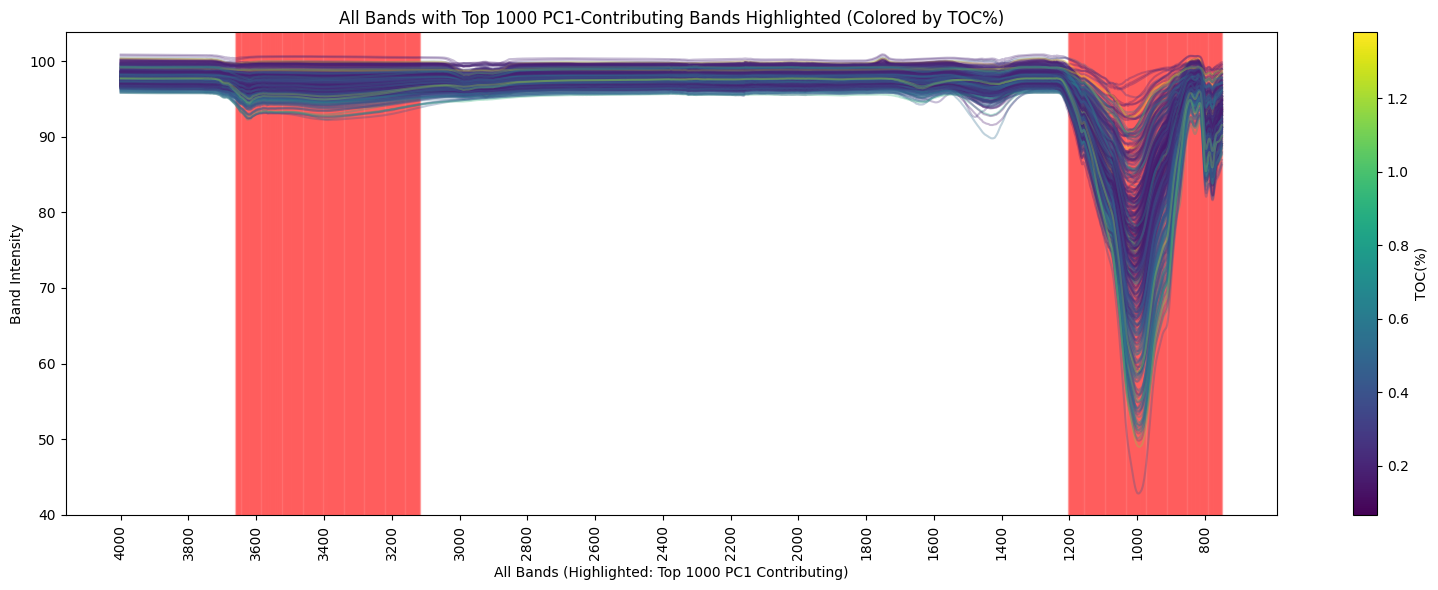

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


file_path = "E:\論文\土壤論文區\ALL_386_南科(CDF_Remove_Outliers).csv"  # 請依實際路徑調整
df = pd.read_csv(file_path)


toc_column = 'TOC(%)'
exclude_columns = ['number', 'TC(%)', 'TOC(%)', 'TN(%)', 'TIC(%)', 'ROC(%)', 'LOC(%)']
band_columns = [col for col in df.columns if col not in exclude_columns]


pca = PCA(n_components=1)
pca.fit(df[band_columns])
pc1 = pca.components_[0] #PC1


top_1000_indices = np.argsort(np.abs(pc1))[-1000:] # 取得絕對值最大的前1000個索引
top_1000_bands = np.array(band_columns)[top_1000_indices]
print(f"Top 1000 contributing bands: {top_1000_bands}")

fig, ax = plt.subplots(figsize=(16, 6))


for i in range(len(df)):
    ax.plot(
        range(len(band_columns)),
        df.loc[i, band_columns],
        color=plt.cm.viridis(df.loc[i, toc_column] / df[toc_column].max()),
        alpha=0.3
    )

#加上紅色透明標示區間（highlight 前 1000 個重要波段）
for idx in top_1000_indices:
    ax.axvspan(idx - 0.5, idx + 0.5, color='red', alpha=0.15)


ax.set_xticks(np.arange(len(band_columns))[::200])
ax.set_xticklabels(np.array(band_columns)[::200], rotation=90)
ax.set_xlabel("All Bands (Highlighted: Top 1000 PC1 Contributing)")
ax.set_ylabel("Band Intensity")
ax.set_title("All Bands with Top 1000 PC1-Contributing Bands Highlighted (Colored by TOC%)")


norm = plt.Normalize(vmin=df[toc_column].min(), vmax=df[toc_column].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])


plt.colorbar(sm, ax=ax, label="TOC(%)")

plt.tight_layout()
plt.show()